In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

1. Первичный анализ данных

In [ ]:
df_train.shape

(1460, 81)

In [ ]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
df_train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [ ]:
df_train.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [ ]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
df_na = df_train.isnull().sum().sort_values(ascending=False)

In [ ]:
pl = df_na.sort_values(ascending=False)

In [ ]:
pl = pl.drop(df_na[df_na==0].index).sort_values(ascending=False)

In [ ]:
pl

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageFinish      81
GarageType        81
GarageQual        81
GarageCond        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
dtype: int64

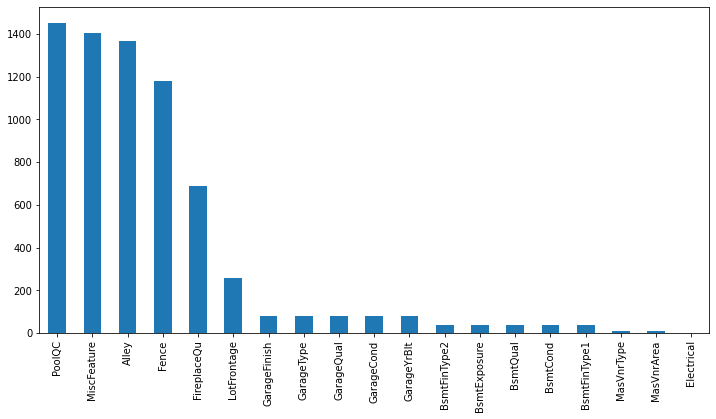

In [ ]:
plt.subplots(figsize=(12,6))
pl.plot.bar()

Пропущеные данные на самом деле не пропущенные, а отсутствующие опции домов. Для принятий решения об их использовании при создании модели необходимо смотреть корреляцию с остальными данными и с SalePrice.

График распределения SalePrice:

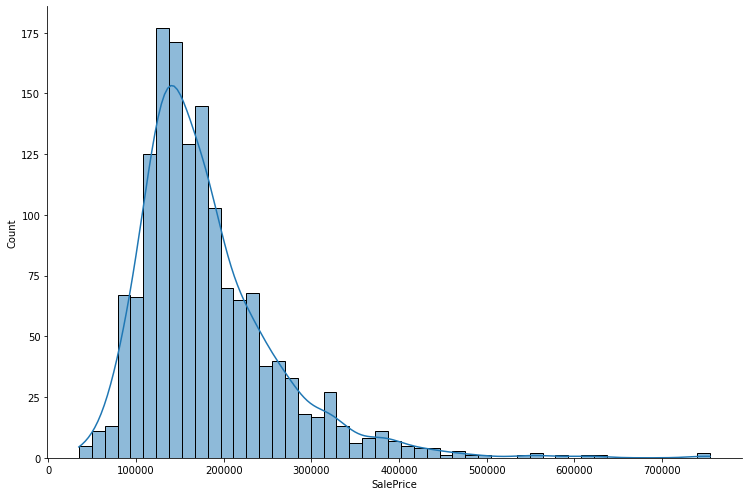

In [ ]:
sns.displot(x=df_train['SalePrice'],kde=True,height=7,aspect=1.5);

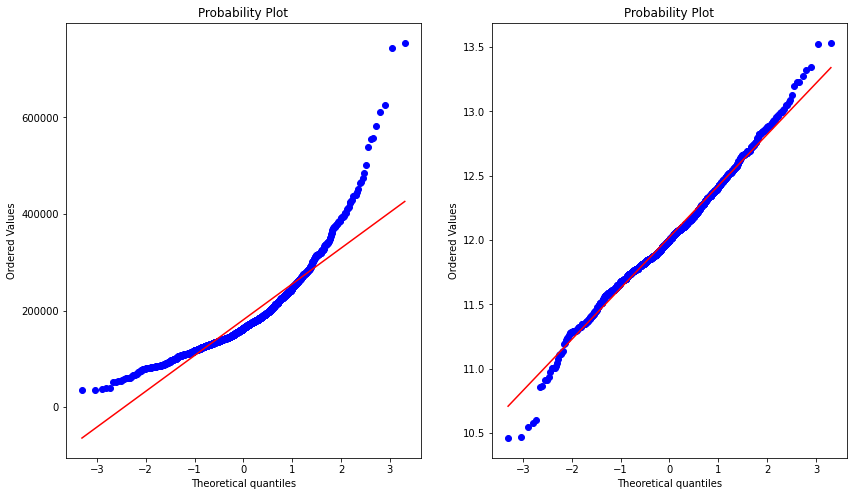

In [ ]:
from scipy import stats

fig = plt.figure(figsize = (14,8))

# Распределение на необработанных данных
fig.add_subplot(1,2,1)
res = stats.probplot(df_train['SalePrice'], plot=plt)

# Распределение при условии, что мы прологарифмировали 'SalePrice'
fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df_train['SalePrice']), plot=plt)

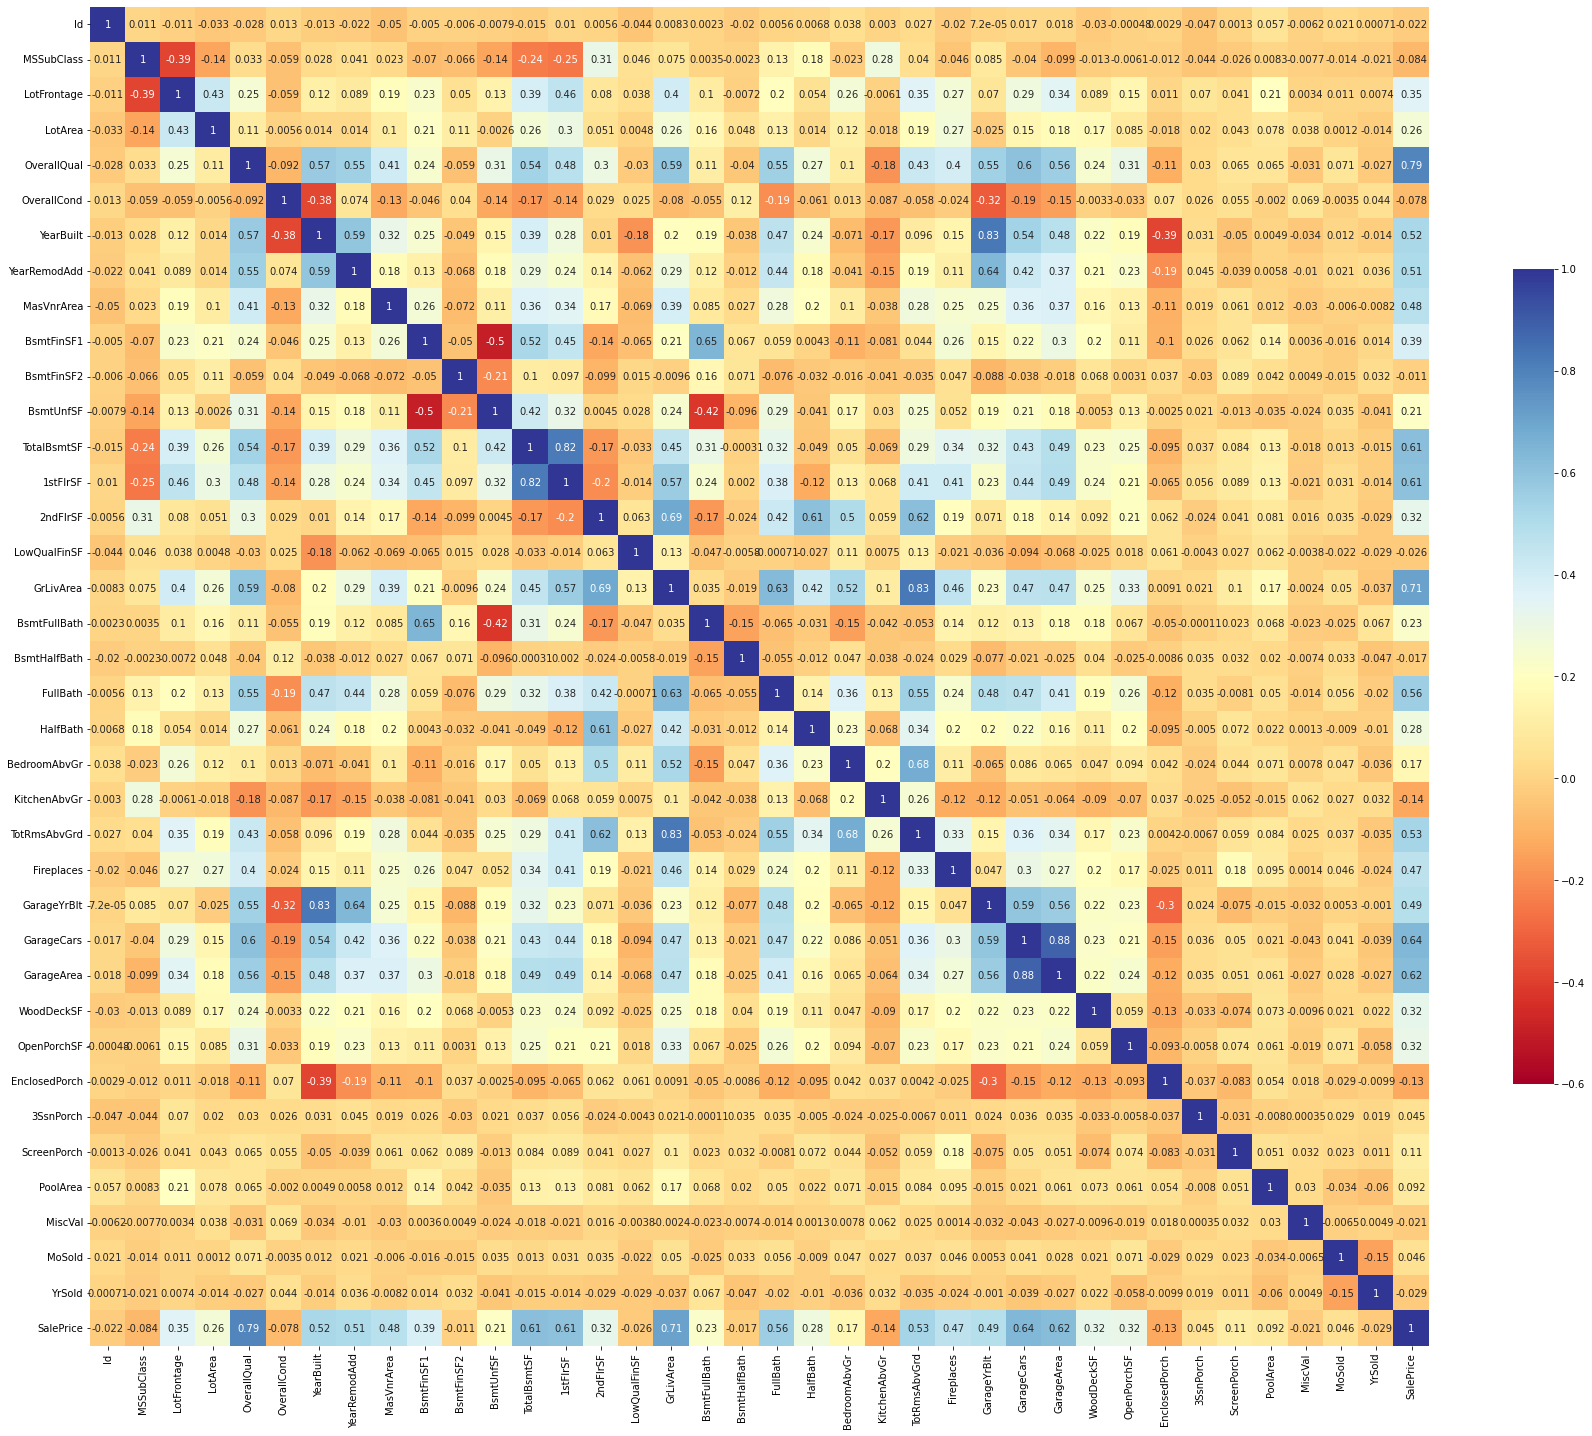

In [ ]:
corr = df_train.corr()
plt.subplots(figsize=(30,30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True)

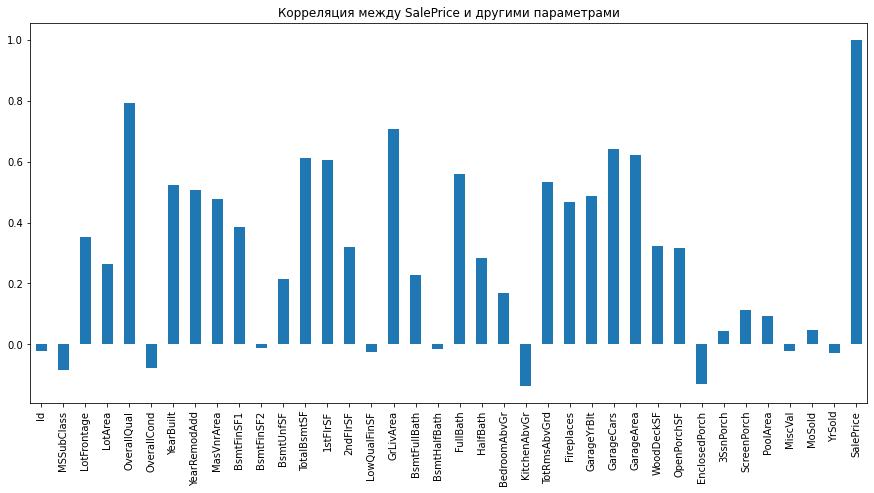

In [ ]:
corr['SalePrice'].plot(kind='bar',figsize=(15,7),title='Корреляция между SalePrice и другими параметрами')

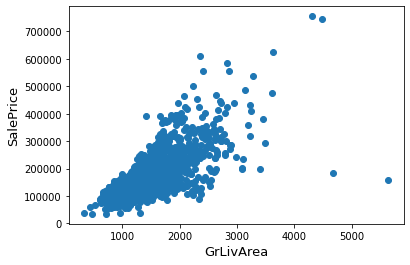

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

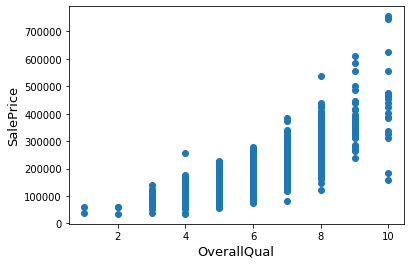

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['OverallQual'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

2. Пропущенные данные и выбросы

2.1 Избавляемся от выбросов

In [ ]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice'] < 300000)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['OverallQual']>9) & (df_train['SalePrice'] < 200000)].index)

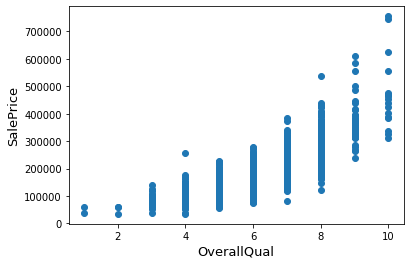

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['OverallQual'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

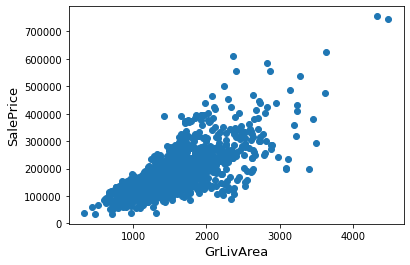

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

2.2 Работа с пропущенными данными

In [ ]:
pl

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageFinish      81
GarageType        81
GarageQual        81
GarageCond        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
dtype: int64

In [ ]:
def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False) / len(df)*100, 2)
    temp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(df_train)

Total  Percent
PoolQC         1452    99.59
MiscFeature    1404    96.30
Alley          1367    93.76
Fence          1177    80.73
FireplaceQu     690    47.33
LotFrontage     259    17.76
GarageYrBlt      81     5.56
GarageCond       81     5.56
GarageType       81     5.56
GarageFinish     81     5.56
GarageQual       81     5.56
BsmtFinType2     38     2.61
BsmtExposure     38     2.61
BsmtQual         37     2.54
BsmtCond         37     2.54
BsmtFinType1     37     2.54
MasVnrArea        8     0.55
MasVnrType        8     0.55
Electrical        1     0.07

Рассмотрим отдельно колонку GarageYrBlt

In [ ]:
df_garage = df_train[['GarageYrBlt','GarageType','GarageFinish','GarageCars','GarageQual','GarageCond','GrLivArea','SalePrice']].copy()


In [ ]:
df_garage[df_garage.isnull().any(1)].head(5)

GarageYrBlt GarageType GarageFinish  GarageCars GarageQual GarageCond  \
39          NaN        NaN          NaN           0        NaN        NaN   
48          NaN        NaN          NaN           0        NaN        NaN   
78          NaN        NaN          NaN           0        NaN        NaN   
88          NaN        NaN          NaN           0        NaN        NaN   
89          NaN        NaN          NaN           0        NaN        NaN   

    GrLivArea  SalePrice  
39       1152      82000  
48       1452     113000  
78       1768     136500  
88       1526      85000  
89        990     123600

NaN указывает на отсутствие гаража в доме, поэтому нет и данных о времени его постройки.
Заменяем NaN на -1.

In [ ]:
df_train['GarageYrBlt'].fillna(value=-1, inplace=True)
df_test['GarageYrBlt'].fillna(value=-1, inplace=True)

In [ ]:
pd.set_option('display.max_rows', None)
df_train['GarageYrBlt'].head(10)

0    2003.0
1    1976.0
2    2001.0
3    1998.0
4    2000.0
5    1993.0
6    2004.0
7    1973.0
8    1931.0
9    1939.0
Name: GarageYrBlt, dtype: float64

Пропуски в колонках LotFrontage и MasVnrArea заменяем на медиану.

In [ ]:
df_train['LotFrontage'].fillna(df_train['LotFrontage'].median(skipna=True), inplace=True)
df_test['LotFrontage'].fillna(df_test['LotFrontage'].median(skipna=True), inplace=True)
df_train['MasVnrArea'].fillna(0)
df_test['MasVnrArea'].fillna(0)

0          0.0
1        108.0
2          0.0
3         20.0
4          0.0
5          0.0
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
11       504.0
12       492.0
13         0.0
14         0.0
15       162.0
16       256.0
17       615.0
18       240.0
19      1095.0
20       232.0
21       178.0
22         0.0
23        14.0
24         0.0
25         0.0
26       114.0
27       226.0
28         0.0
29         0.0
30       122.0
31         0.0
32       250.0
33       504.0
34       180.0
35         0.0
36         0.0
37       120.0
38         0.0
39       216.0
40      1159.0
41         0.0
42         0.0
43         0.0
44         0.0
45       120.0
46         0.0
47         0.0
48         0.0
49       172.0
50         0.0
51       268.0
52         0.0
53       144.0
54       265.0
55       340.0
56       216.0
57         0.0
58       506.0
59       150.0
60        91.0
61       432.0
62         0.0
63         0.0
64         0.0
65         0.0
66        

Колонки типа object кодируем через LabelEncoder, чтобы не увеличивать размер датасета и одновременно избавиться от пропущенных значений

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
def HandleMissingValues(df):
    cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
    for a in cat_cols:
        le.fit(df[a])
        df[a] = le.transform(df[a])


HandleMissingValues(df_test)
HandleMissingValues(df_train)
df_test.head()


Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  1461          20         2         80.0    11622       1      2         3   
1  1462          20         3         81.0    14267       1      2         0   
2  1463          60         3         74.0    13830       1      2         0   
3  1464          60         3         78.0     9978       1      2         0   
4  1465         120         3         43.0     5005       1      2         0   

   LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
0            3          0  ...          120         0       2      2   
1            3          0  ...            0         0       2      4   
2            3          0  ...            0         0       2      2   
3            3          0  ...            0         0       2      4   
4            1          0  ...          144         0       2      4   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0            3        0       6    2010         8              4  
1            0    12500       6    2010         8              4  
2            3        0       3    2010         8              4  
3            3        0       6    2010         8              4  
4            3        0       1    2010         8              4  

[5 rows x 80 columns]

In [ ]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [ ]:
df_test.isnull

<bound method DataFrame.isnull of         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     1461          20         2         80.0    11622       1      2   
1     1462          20         3         81.0    14267       1      2   
2     1463          60         3         74.0    13830       1      2   
3     1464          60         3         78.0     9978       1      2   
4     1465         120         3         43.0     5005       1      2   
5     1466          60         3         75.0    10000       1      2   
6     1467          20         3         67.0     7980       1      2   
7     1468          60         3         63.0     8402       1      2   
8     1469          20         3         85.0    10176       1      2   
9     1470          20         3         70.0     8400       1      2   
10    1471         120         2         26.0     5858       1      2   
11    1472         160         4         21.0     1680       1      2   
12    1473       

In [ ]:
df_train.head(50).style.set_properties(**{'background-color': 'aliceblue' ,'color':'black','border-color': '#8b8c8c'})

Строим матрицу корреляций на основе очищенных данных

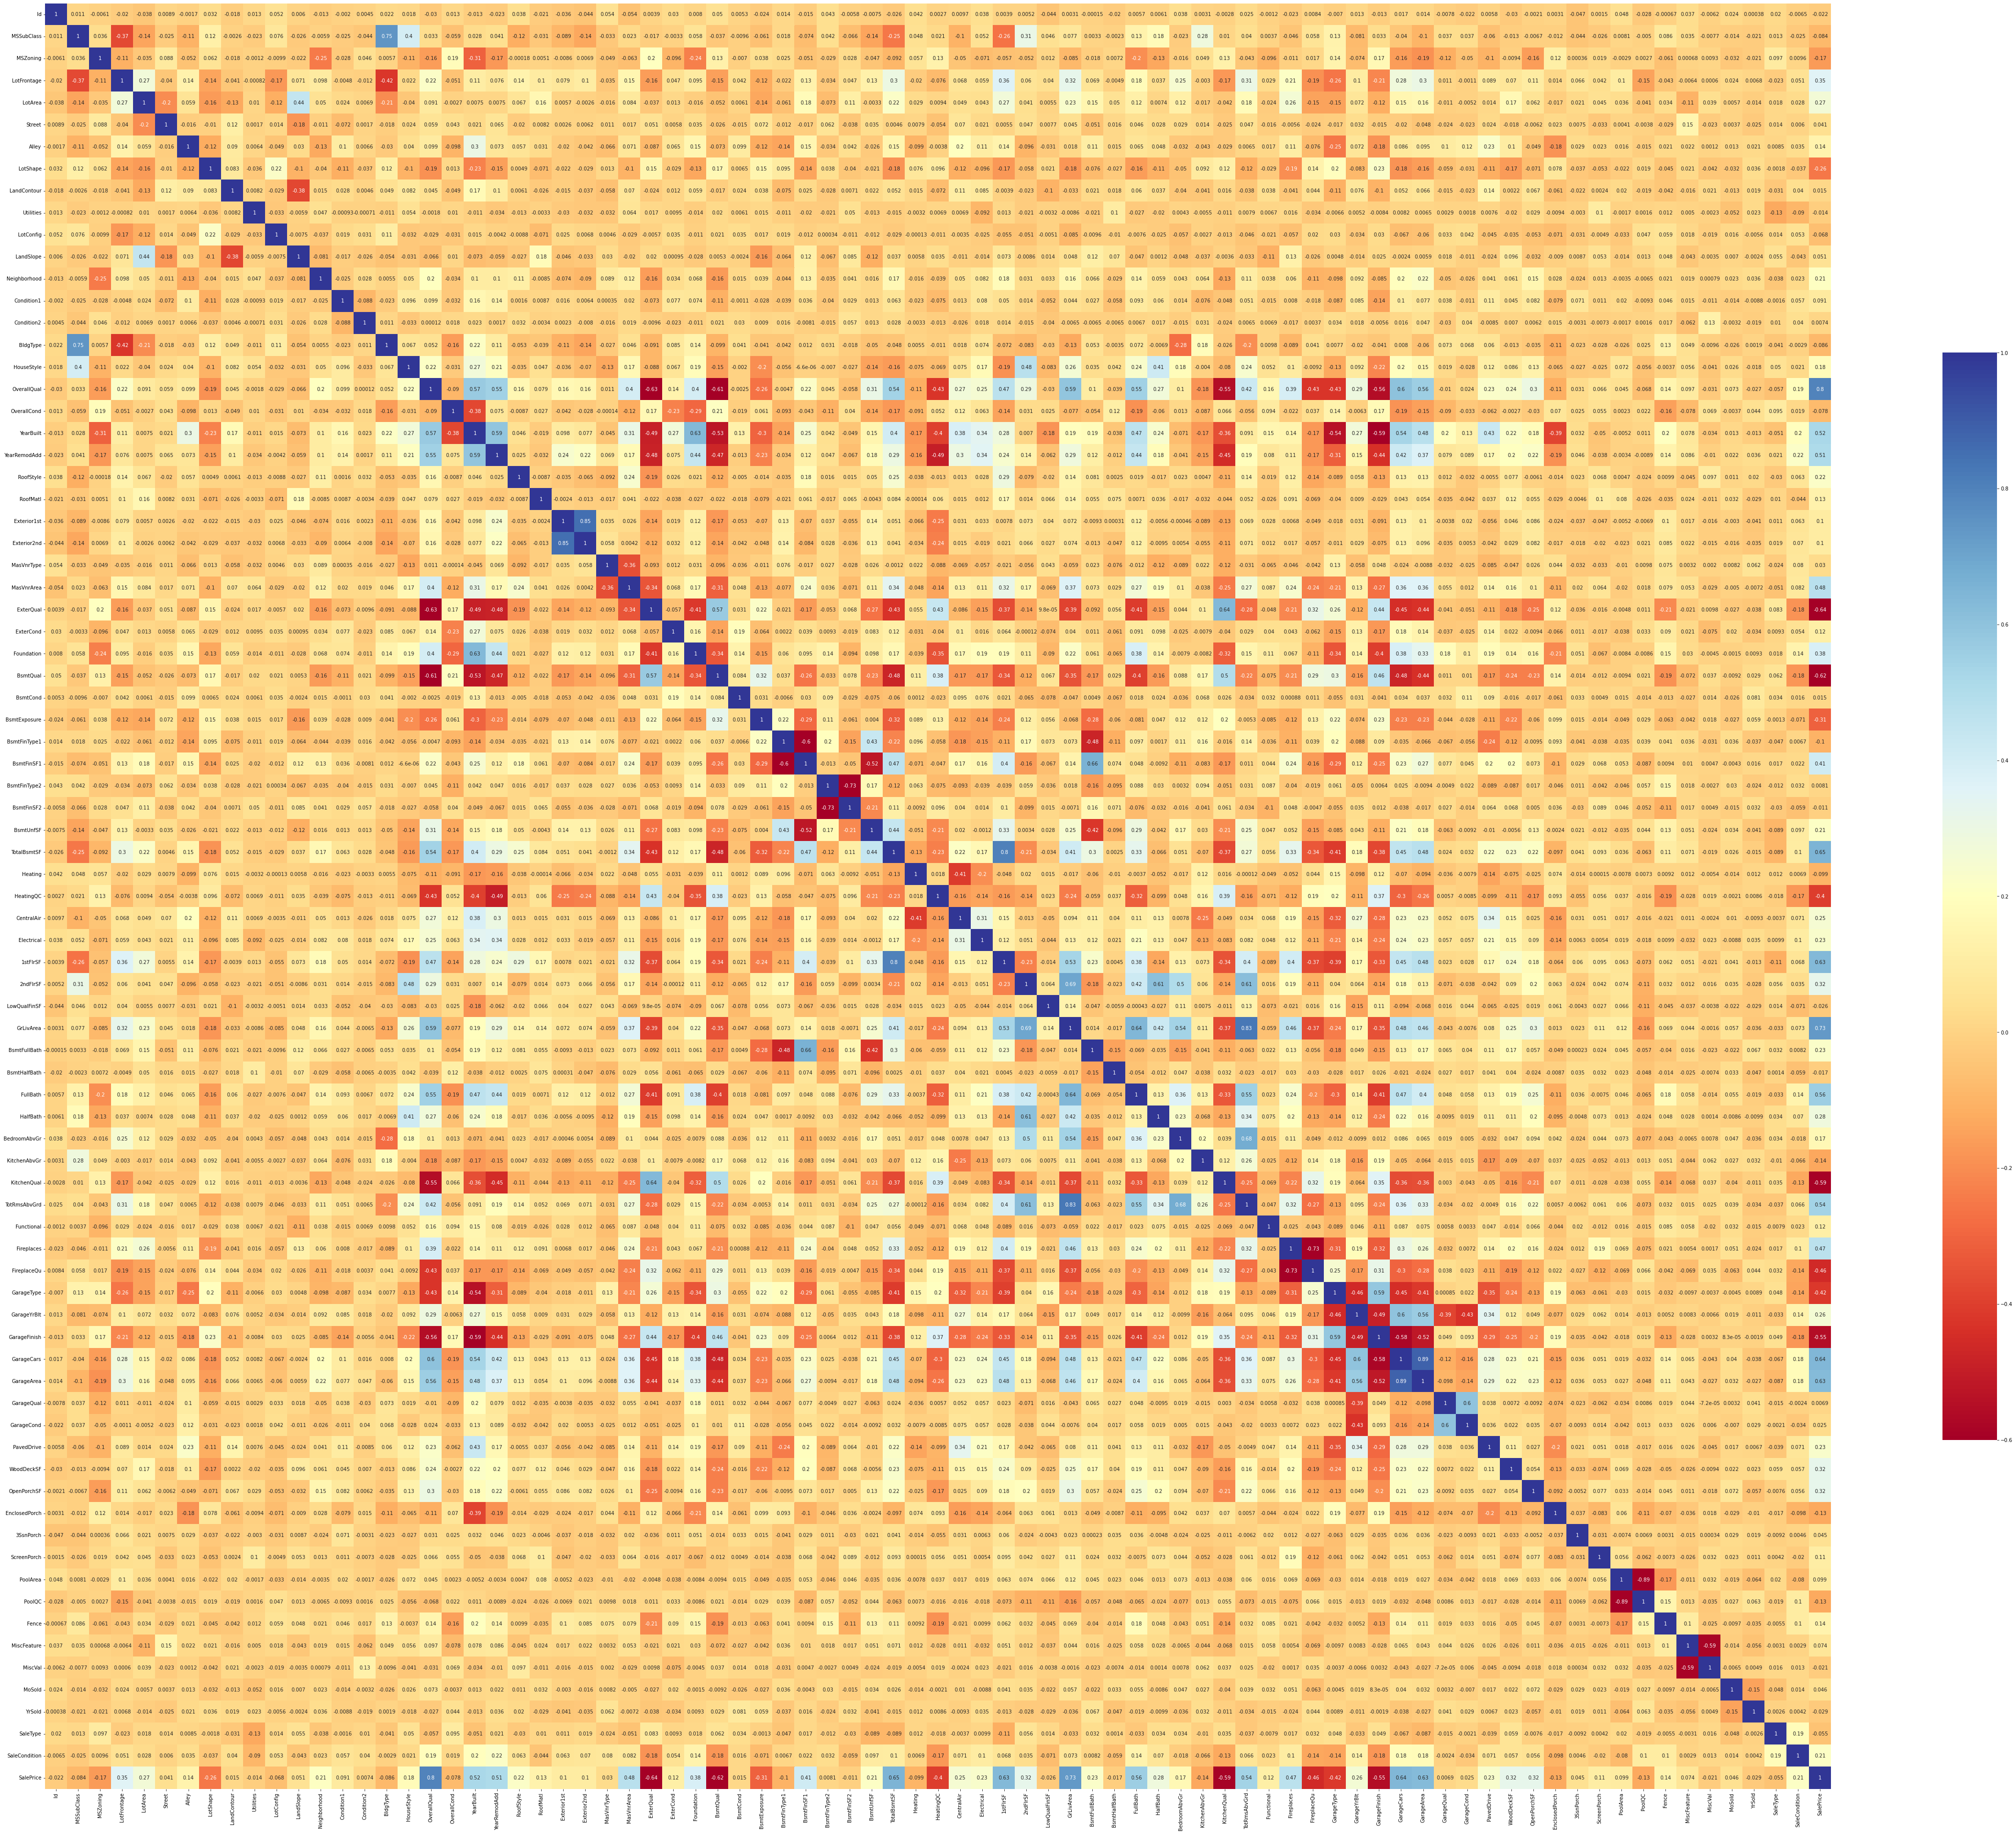

In [ ]:
corr = df_train.corr()
plt.subplots(figsize=(80,80))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True)

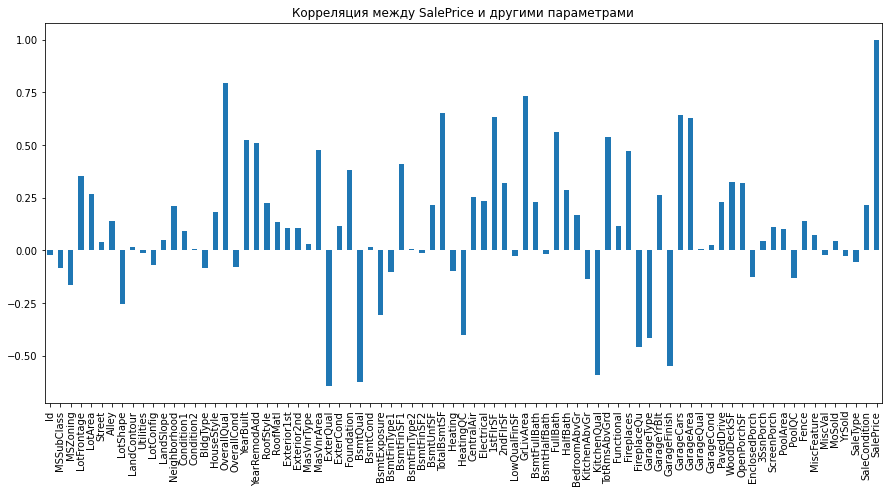

In [ ]:
corr['SalePrice'].plot(kind='bar',figsize=(15,7),title='Корреляция между SalePrice и другими параметрами')

Выводы:

Наибольшее влияние на цену дома оказывают следующие признаки:
(+):
OverallQuality (качестов материалов и законченность дома)
YearBuilt (год постройки)
YearRemodAdd (год ренновации)
TotalBsmtSF (площадь подвала)
1stFloorSF (площадь первого этажа)
GrLivArea (наличие доп этажей/цоколей)
FullBath (наличие ванной комнаты)
GarageCars (вместительность гаража)
GarageArea (площадь гаража);
(-):
ExterQuality (качество материалов снаружи)
BasmentQuality (качество подвала)
KitchenQuality (качество кухни)
GarageFinish (законченность гаража)

3. Обучение моделей

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LassoLars, SGDRegressor, Ridge, LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
y = df_train["SalePrice"]
X = df_train.drop("SalePrice", axis=1)

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y,
                                               test_size=0.2,
                                               random_state=0)

Модель Random Forest:

In [ ]:
model_1 =  RandomForestRegressor(n_estimators=10,
                               oob_score=True,
                               random_state=1)

In [ ]:
model_1.fit(train_X, train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=1)

In [ ]:
a = model_1.predict(val_X)

In [ ]:
print ("MAE (RF) = ", mean_absolute_error(val_y, a))
print ("MSE (RF) = ", mean_squared_error(val_y, a))
print ("R2 (RF) = ", r2_score(val_y, a))
print ("MSLE (RF) = ", mean_squared_log_error(val_y, a))

MAE (RF) =  18462.897945205477
MSE (RF) =  683511849.3345206
R2 (RF) =  0.9025853197122791
MSLE (RF) =  0.017904325669795332


In [ ]:
pred_forest = model_1.predict(df_test)

Модель Gradient Boosting:

In [ ]:
model_2 = GradientBoostingRegressor(n_estimators=400,random_state = 42)

In [ ]:
model_2.fit(train_X, train_y)

GradientBoostingRegressor(n_estimators=400, random_state=42)

In [ ]:
a_2 = model_2.predict(val_X)

In [ ]:
print ("MAE (GB) = ", mean_absolute_error(val_y, a_2))
print ("MSE (GB) = ", mean_squared_error(val_y, a_2))
print ("R2 (GB) = ", r2_score(val_y, a_2))
print ("MSLE (GB) = ", mean_squared_log_error(val_y, a_2))

MAE (GB) =  15204.932077533438
MSE (GB) =  488755922.75276375
R2 (GB) =  0.9303420972144866
MSLE (GB) =  0.013913291885564182


In [ ]:
pred_m2 = model_2.predict(df_test)

In [ ]:
submission = {
    'Id': df_test.Id.values,
    'SalePrice': pred_m2
}
solution = pd.DataFrame(submission)
solution.to_csv('submission.csv',index=False)

Модель Decision tree:

In [ ]:
model_3 = DecisionTreeRegressor(random_state = 42)

In [ ]:
model_3.fit(train_X, train_y)

DecisionTreeRegressor(random_state=42)

In [ ]:
a_3 = model_3.predict(val_X)

In [ ]:
print ("MAE (DTR) = ", mean_absolute_error(val_y, a_3))
print ("MSE (DTR) = ", mean_squared_error(val_y, a_3))
print ("R2 (DTR) = ", r2_score(val_y, a_3))
print ("MSLE (DTR) = ", mean_squared_log_error(val_y, a_3))

MAE (DTR) =  24266.044520547945
MSE (DTR) =  1232522336.2773972
R2 (DTR) =  0.8243398860563489
MSLE (DTR) =  0.03194051985988852


In [ ]:
val_X

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
411    412         190         3        100.0    34650       1      2   
211    212          20         3         83.0    10420       1      2   
342    343          90         3         69.0     8544       1      2   
303    304          20         3         70.0     9800       1      2   
159    160          60         3        134.0    19378       1      2   
1048  1049          20         3        100.0    21750       1      2   
980    981          85         3         69.0    12122       1      2   
233    234          20         3         75.0    10650       1      2   
254    255          20         3         70.0     8400       1      2   
1362  1363          50         3         69.0    12513       1      2   
762    763          60         1         72.0     8640       1      2   
734    735          20         3         69.0     8978       1      2   
1272  1273          20         3         69.0    13526       1      2   
31      32          20         3         69.0     8544       1      2   
1123  1124          20         3         50.0     9405       1      2   
1381  1382          20         3         69.0    12925       1      2   
279    280          60         3         83.0    10005       1      2   
107    108          20         4         50.0     6000       1      2   
310    311          60         3         69.0     7685       1      2   
591    592          60         3         97.0    13478       1      2   
34      35         120         3         60.0     7313       1      2   
1428  1429          30         4         60.0     7200       1      2   
1028  1029          50         3         79.0     9492       1      2   
52      53          90         4        110.0     8472       0      2   
223    224          20         3         70.0    10500       1      2   
1230  1231          90         3         69.0    18890       1      2   
1059  1060          50         3         69.0    11275       1      2   
1101  1102          20         3         61.0     9758       1      2   
956    957         160         4         24.0     1300       1      2   
1046  1047          60         3         85.0    16056       1      2   
299    300          20         3         80.0    14000       1      2   
1300  1301          60         3         69.0    10762       1      2   
1197  1198          75         4         65.0     8850       1      2   
175    176          20         3         84.0    12615       1      2   
826    827          45         4         50.0     6130       1      2   
609    610          20         3         61.0     7943       1      2   
1060  1061         120         3         41.0     4920       1      2   
1316  1317          20         3         61.0    10226       1      2   
1098  1099          50         4         50.0     6000       1      2   
649    650         180         4         21.0     1936       1      2   
54      55          80         3         60.0     7134       1      2   
333    334         120         4         59.0     8198       1      2   
984    985          90         3         75.0    10125       1      2   
633    634          20         3         80.0     9250       1      2   
298    299          60         3         90.0    11700       1      2   
921    922          90         3         67.0     8777       1      2   
568    569          50         3         79.0    12327       1      2   
759    760          60         3         65.0    12257       1      2   
769    770          60         3         47.0    53504       1      2   
1403  1404          20         3         49.0    15256       1      2   
937    938          60         3         75.0     9675       1      2   
308    309          30         3         69.0    12342       1      2   
1012  1013          70         3         55.0    10592       1      2   
543    544         120         2         34.0     4058       1    

Выводы:

Наилучшим образом себя показала модель градиентного бустинга (n_estimators=400,random_state = 42) выдав результат: MAE (GB) =  15163. Также из значения показателя R2 можно сделать вывод, что прогноз модели довольно точен и дает 93%.